In [1]:
import Rmhmc
import jax.numpy as np
import numpy as onp
import jax
import importlib
import matplotlib.pyplot as plt
import scipy.fftpack as FFT

In [24]:
importlib.reload(Rmhmc)

<module 'Rmhmc' from '/home/muhammad/GitHub/Reimmanian-Manifold-HMC/Rmhmc.py'>

In [25]:
u = np.array([0.,6])
target = Rmhmc.Target(Rmhmc.fourth_order_neglog,2,u)

In [29]:
x_init = np.array([0.,0.])
p_init = np.array([0.,0.])
epsilon = 0.5*target.d**(-0.25)
l = 100#1.5/epsilon
omega = 100
ham = Rmhmc.Hamiltonian(target,x_init,p_init)
lFrog = Rmhmc.Leapfrog(epsilon,l,omega,target,ham)
hmc = Rmhmc.RMHMC(100,target,x_init,p_init)

In [30]:
target.softabs_const = 4e0
hmc.nsamples = 5000
%time hmc.run()

is there any nan here? True


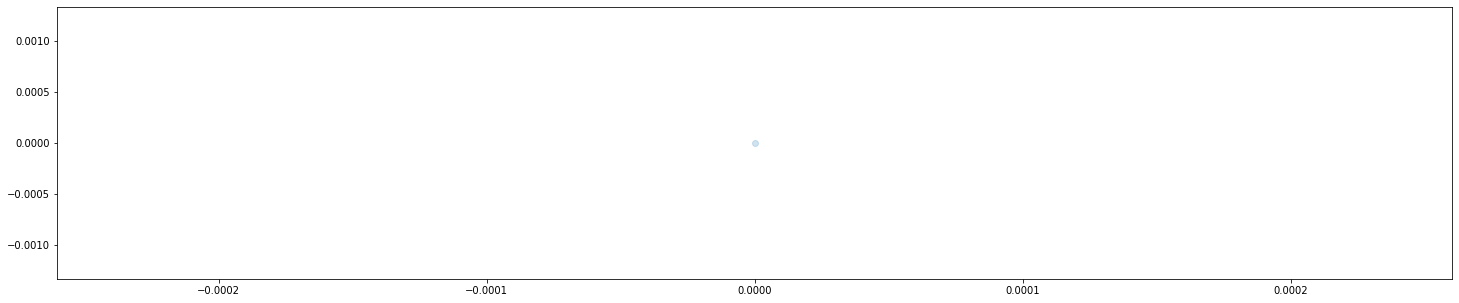

In [28]:
print('is there any nan here? {}'.format(onp.any(onp.isnan(hmc.samples))))
plt.figure(figsize=(25,5))
plt.plot(hmc.samples[:,0],hmc.samples[:,1],alpha=0.8,linewidth=0.3)
plt.scatter(hmc.samples[:,0],hmc.samples[:,1],alpha=0.2)

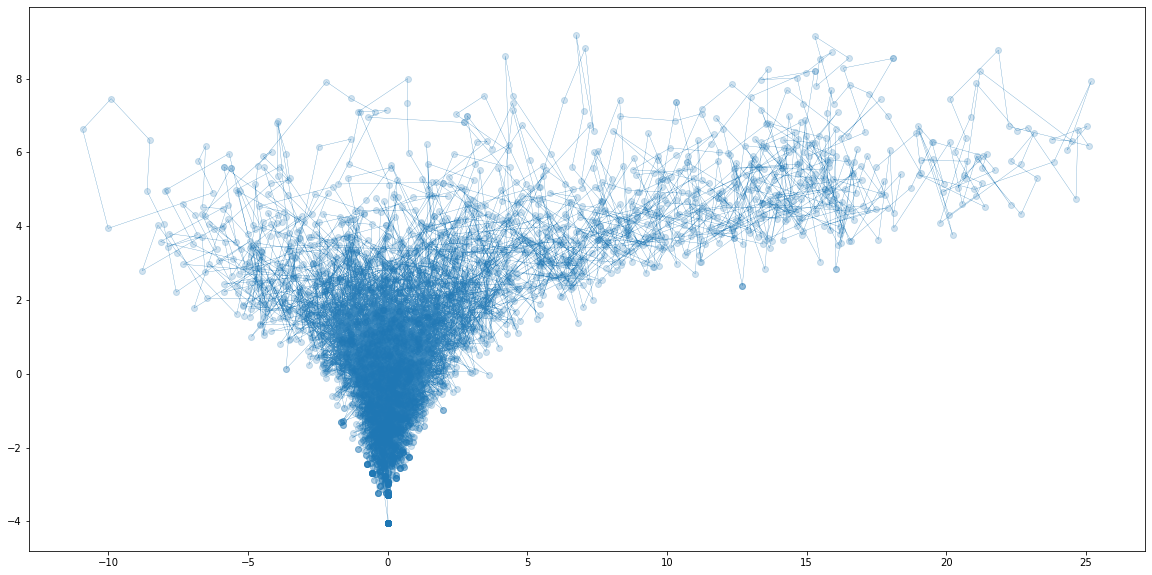

In [25]:
plt.figure(figsize=(20,10))
plt.plot(hmc.samples[:,0],hmc.samples[:,1],alpha=0.8,linewidth=0.3)
plt.scatter(hmc.samples[:,0],hmc.samples[:,1],alpha=0.2)

In [7]:
onp.any(onp.isnan(hmc.samples))

False

In [64]:
xp = hmc.samples[:,0] - onp.mean(hmc.samples[:,0])
n = xp.shape[0]
xp = onp.r_[xp[:n//2], np.zeros_like(xp), xp[n//2:]]
f = FFT.fft(xp)
p = onp.absolute(f)**2
pi = FFT.ifft(p)
ac = onp.real(pi)[:n//2]/pi[0].real#/(onp.arange(n//2)[::-1]+n//2)

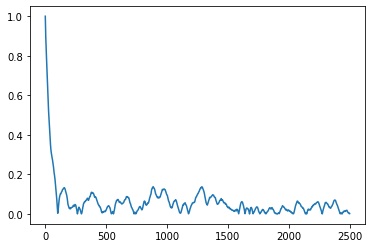

In [40]:
plt.plot(onp.abs(ac))

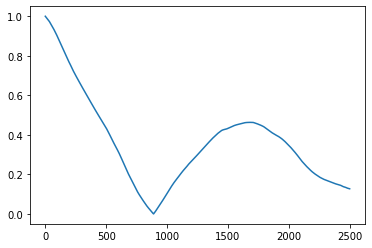

In [65]:
plt.plot(onp.abs(ac))

In [57]:
lFrog.l

AttributeError: 'Leapfrog' object has no attribute 'l'